In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [9]:
import seaborn as sns
titanic=sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.groupby(["sex","class"])["survived"].aggregate("mean").unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [17]:
titanic.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [88]:
aapl=pandas_datareader.DataReader("AAPL","yahoo")
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.372231
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.782711
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.829010
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.402260
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.353460


In [89]:
goog=pandas_datareader.DataReader("GOOG","yahoo")
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,311.532288,308.832428,311.208527,308.832428,2448700.0,308.832428
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735


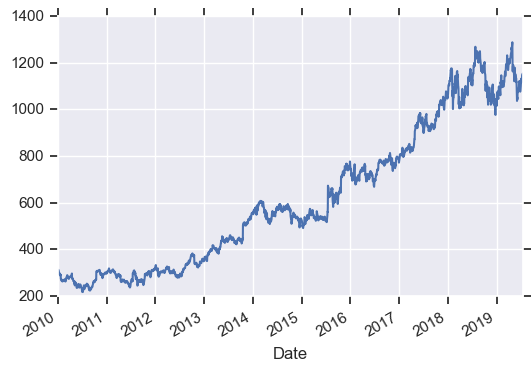

In [93]:
import datetime
goog_close=goog.loc[datetime.date(2006,1,1):]["Close"]
goog_close.plot()

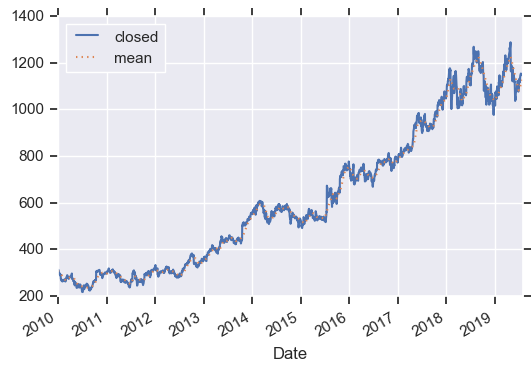

In [95]:
goog_close.plot(style="-")
goog_close.resample("M").mean().plot(style=":")
plt.legend(["closed","mean"],loc="upper left")

In [98]:
rolling=goog_close.rolling(window=10,center=True)
data=pd.DataFrame({"Closed":goog_close,"rolling_mean":rolling.mean()})
data.head(20)

,Closed,rolling_mean
Date,,
2009-12-31,308.832428,NaN
2010-01-04,312.204773,NaN
2010-01-05,310.829926,NaN
2010-01-06,302.994293,NaN
2010-01-07,295.940735,NaN
2010-01-08,299.885956,301.053076
2010-01-11,299.432648,299.061539
2010-01-12,294.137512,297.112344
2010-01-13,292.448822,294.941483


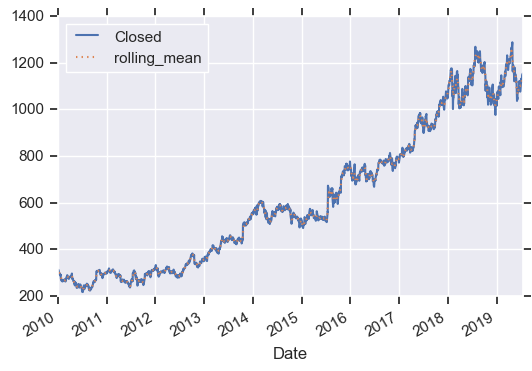

In [99]:
data.plot(style=["-",":"])